# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [13]:
import requests
import pandas as pd

## Список объектов

In [22]:
offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()

In [8]:
type(objects_data)

dict

In [31]:
objects_data_ex = res.content
dfdf = pd.read_json(objects_data_ex)
dfdf.head()

data  errcode
list   [{'objId': 13397, 'developer': {'devId': 306, ...        0
total                                              10076        0

In [25]:
# res.json()
objects_data

{'data': {'list': [{'objId': 13397,
    'developer': {'devId': 306,
     'shortName': '2МЕН ГРУПП',
     'fullName': '2МЕН ГРУПП',
     'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
     'orgForm': {'id': 1,
      'fullForm': 'Акционерное общество',
      'shortForm': 'АО'},
     'companyGroup': 699421001,
     'devInn': '7701651356'},
    'rpdRegionCd': 72,
    'objAddr': 'г Тюмень, ул Профсоюзная, д. 56',
    'objFloorMin': 6,
    'objFloorMax': 12,
    'objElemLivingCnt': 65,
    'objReady100PercDt': '2024-12-31',
    'objSquareLiving': 6248.51,
    'objCompensFundFlg': 0,
    'objProblemFlg': 0,
    'latitude': 57.1519,
    'longitude': 65.5544,
    'problemFlag': 'NONE',
    'siteStatus': 'Строящиеся',
    'objGuarantyEscrowFlg': 0,
    'residentialBuildings': 1,
    'rpdNum': '72-000097',
    'pdId': 28141,
    'buildType': 'Жилое',
    'objStatus': 0},
   {'objId': 13383,
    'developer': {'devId': 306,
     'shortName': '2МЕН ГРУПП',
     'fullName': '2МЕН ГРУПП',
     'groupName': '2

In [23]:
objects_data.keys()

dict_keys(['data', 'errcode'])

In [26]:
objects_data.get('data').keys()

dict_keys(['list', 'total'])

In [27]:
 objects_data.get('data').get('list')

[{'objId': 13397,
  'developer': {'devId': 306,
   'shortName': '2МЕН ГРУПП',
   'fullName': '2МЕН ГРУПП',
   'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
   'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
   'companyGroup': 699421001,
   'devInn': '7701651356'},
  'rpdRegionCd': 72,
  'objAddr': 'г Тюмень, ул Профсоюзная, д. 56',
  'objFloorMin': 6,
  'objFloorMax': 12,
  'objElemLivingCnt': 65,
  'objReady100PercDt': '2024-12-31',
  'objSquareLiving': 6248.51,
  'objCompensFundFlg': 0,
  'objProblemFlg': 0,
  'latitude': 57.1519,
  'longitude': 65.5544,
  'problemFlag': 'NONE',
  'siteStatus': 'Строящиеся',
  'objGuarantyEscrowFlg': 0,
  'residentialBuildings': 1,
  'rpdNum': '72-000097',
  'pdId': 28141,
  'buildType': 'Жилое',
  'objStatus': 0},
 {'objId': 13383,
  'developer': {'devId': 306,
   'shortName': '2МЕН ГРУПП',
   'fullName': '2МЕН ГРУПП',
   'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
   'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortFo

In [28]:
objects_list = objects_data.get('data').get('list')

In [30]:
objids = [x.get('objId') for x in objects_list]
len(objids)

1000

In [32]:
objids[:10] 

[13397, 13383, 13398, 13399, 23682, 36321, 36912, 44076, 23494, 27476]

In [35]:
df = pd.json_normalize(objects_list)
df.tail()

objId  rpdRegionCd                                            objAddr  \
995  11019           50                                       д Покровское   
996  11016           50                                       д Покровское   
997  43491           76  г Ярославль, пр-т Машиностроителей, д. 6,6, ли...   
998  25252           61  г Ростов-на-Дону, проспект Михаила Нагибина, д...   
999  41834           50                           с/п Развилковское, д. 10   

     objFloorMin  objFloorMax  objElemLivingCnt objReady100PercDt  \
995            2            2                 5        2022-12-31   
996            2            2                 6        2022-12-31   
997           18           18               144        2023-09-30   
998           20           20               207        2022-06-30   
999           19           19               282        2023-06-30   

     objSquareLiving  objCompensFundFlg  objProblemFlg  ...  \
995           843.10                  1              0  ...   
996          1011.70                  1              0  ...   
997          8541.32                  0              0  ...   
998         23428.99                  1              0  ...   
999         15722.90                  0              0  ...   

                   developer.orgForm.fullForm  developer.orgForm.shortForm  \
995  Общество с ограниченной ответственностью                          ООО   
996  Общество с ограниченной ответственностью                          ООО   
997  Общество с ограниченной ответственностью                          ООО   
998  Общество с ограниченной ответственностью                          ООО   
999  Общество с ограниченной ответственностью                          ООО   

    developer.companyGroup developer.devInn  \
995           5.127020e+09       7707796333   
996           5.127020e+09       7707796333   
997           4.549540e+08       7603066710   
998           6.605718e+09       7701361819   
999                    NaN       7724743980   

                                 objCommercNm  complexShortName  \
995  ЖК Футуро Парк (Futuro Park), Корпус №62               NaN   
996  ЖК Футуро Парк (Futuro Park), Корпус №60               NaN   
997                                       NaN               NaN   
998                                       NaN               NaN   
999                          ЖК"Три квартала"               NaN   

    developer.bankruptStage.bankruptStageCd  \
995                                     NaN   
996                                     NaN   
997                                     NaN   
998                                     NaN   
999                                     NaN   

     developer.bankruptStage.bankruptStageDesc  \
995                                        NaN   
996                                        NaN   
997                                        NaN   
998                                        NaN   
999                                        NaN   

    developer.bankruptStage.bankruptLawUrl  developer.orgBankruptMsgDttm  
995                                    NaN                           NaN  
996                                    NaN                           NaN  
997                                    NaN                           NaN  
998                                    NaN                           NaN  
999                                    NaN                           NaN  

[5 rows x 35 columns]

In [36]:
df.describe()

objId  rpdRegionCd  objFloorMin  objFloorMax  objElemLivingCnt  \
count   1000.00000  1000.000000  1000.000000  1000.000000       1000.000000   
mean   29735.72100    52.923000     9.524000    10.698000        142.884000   
std    11192.60553    23.187599     7.674785     8.283321        187.784178   
min      851.00000     1.000000     0.000000     0.000000          0.000000   
25%    22609.75000    35.000000     3.000000     3.000000         20.000000   
50%    32824.50000    54.000000     7.000000     9.000000         78.000000   
75%    38320.25000    77.000000    15.000000    17.000000        201.250000   
max    45981.00000    91.000000    55.000000    55.000000       1529.000000   

       objSquareLiving  objCompensFundFlg  objProblemFlg    latitude  \
count      1000.000000         1000.00000         1000.0  999.000000   
mean       7350.431090            0.27600            0.0   54.735095   
std        9776.149128            0.44724            0.0    5.068364   
min           0.000000            0.00000            0.0   41.940500   
25%        1026.640000            0.00000            0.0   54.693350   
50%        3768.000000            0.00000            0.0   55.506300   
75%       10402.782500            1.00000            0.0   59.178250   
max      107306.400000            1.00000            0.0   63.928600   

        longitude  objGuarantyEscrowFlg  residentialBuildings           pdId  \
count  999.000000            1000.00000           1000.000000    1000.000000   
mean    48.170237               0.50000              0.872000  194558.945000   
std     22.917174               0.50025              0.334257  185714.745095   
min     19.903300               0.00000              0.000000     172.000000   
25%     36.930500               0.00000              1.000000   55138.500000   
50%     39.040700               0.50000              1.000000   78455.000000   
75%     50.195400               1.00000              1.000000  381502.000000   
max    142.743100               1.00000              1.000000  585318.000000   

       objStatus  developer.devId  developer.orgForm.id  \
count     1000.0      1000.000000           1000.000000   
mean         0.0      3711.409000              7.304000   
std          0.0      3448.455327             18.703032   
min          0.0        32.000000              1.000000   
25%          0.0      1171.000000              4.000000   
50%          0.0      2931.000000              4.000000   
75%          0.0      6270.000000              4.000000   
max          0.0     13654.000000            121.000000   

       developer.companyGroup  developer.bankruptStage.bankruptStageCd  
count            7.570000e+02                                34.000000  
mean             3.859392e+09                                 4.911765  
std              2.779497e+09                                 1.055079  
min              3.020000e+02                                 4.000000  
25%              9.545840e+08                                 4.000000  
50%              3.955566e+09                                 4.000000  
75%              5.874016e+09                                 6.000000  
max              9.856778e+09                                 7.000000

In [43]:
#выводим список названий фичей
l = list(df.columns)
l

['objId',
 'rpdRegionCd',
 'objAddr',
 'objFloorMin',
 'objFloorMax',
 'objElemLivingCnt',
 'objReady100PercDt',
 'objSquareLiving',
 'objCompensFundFlg',
 'objProblemFlg',
 'latitude',
 'longitude',
 'problemFlag',
 'siteStatus',
 'objGuarantyEscrowFlg',
 'residentialBuildings',
 'rpdNum',
 'pdId',
 'buildType',
 'objStatus',
 'developer.devId',
 'developer.shortName',
 'developer.fullName',
 'developer.groupName',
 'developer.orgForm.id',
 'developer.orgForm.fullForm',
 'developer.orgForm.shortForm',
 'developer.companyGroup',
 'developer.devInn',
 'objCommercNm',
 'complexShortName',
 'developer.bankruptStage.bankruptStageCd',
 'developer.bankruptStage.bankruptStageDesc',
 'developer.bankruptStage.bankruptLawUrl',
 'developer.orgBankruptMsgDttm']

In [44]:
#меняем названия колонок: удаляем obj из названия первых колонок за ненадобностью
for i in range(2,10):
    l[i]= l[i][3:]
l

['objId',
 'rpdRegionCd',
 'Addr',
 'FloorMin',
 'FloorMax',
 'ElemLivingCnt',
 'Ready100PercDt',
 'SquareLiving',
 'CompensFundFlg',
 'ProblemFlg',
 'latitude',
 'longitude',
 'problemFlag',
 'siteStatus',
 'objGuarantyEscrowFlg',
 'residentialBuildings',
 'rpdNum',
 'pdId',
 'buildType',
 'objStatus',
 'developer.devId',
 'developer.shortName',
 'developer.fullName',
 'developer.groupName',
 'developer.orgForm.id',
 'developer.orgForm.fullForm',
 'developer.orgForm.shortForm',
 'developer.companyGroup',
 'developer.devInn',
 'objCommercNm',
 'complexShortName',
 'developer.bankruptStage.bankruptStageCd',
 'developer.bankruptStage.bankruptStageDesc',
 'developer.bankruptStage.bankruptLawUrl',
 'developer.orgBankruptMsgDttm']

In [46]:
#присваиваем новые названия колонкам
df.columns=l
df.head()

objId  rpdRegionCd                             Addr  FloorMin  FloorMax  \
0  13397           72  г Тюмень, ул Профсоюзная, д. 56         6        12   
1  13383           72                         г Тюмень         4        20   
2  13398           72  г Тюмень, ул Профсоюзная, д. 56         7        10   
3  13399           72  г Тюмень, ул Профсоюзная, д. 56         1         1   
4  23682           47                      д Агалатово        10        10   

   ElemLivingCnt Ready100PercDt  SquareLiving  CompensFundFlg  ProblemFlg  \
0             65     2024-12-31       6248.51               0           0   
1             68     2022-06-30       6289.98               1           0   
2             43     2024-12-31       4812.98               0           0   
3              0     2024-12-31          0.00               0           0   
4             54     2022-06-30       2748.15               1           0   

   ...                developer.orgForm.fullForm  developer.orgForm.shortForm  \
0  ...                      Акционерное общество                           АО   
1  ...                      Акционерное общество                           АО   
2  ...                      Акционерное общество                           АО   
3  ...                      Акционерное общество                           АО   
4  ...  Общество с ограниченной ответственностью                          ООО   

  developer.companyGroup developer.devInn                objCommercNm  \
0           6.994210e+08       7701651356                         NaN   
1           6.994210e+08       7701651356                         NaN   
2           6.994210e+08       7701651356                         NaN   
3           6.994210e+08       7701651356                         NaN   
4           5.562608e+09       7806536079  Жилой комплекс "84 высота"   

   complexShortName developer.bankruptStage.bankruptStageCd  \
0               NaN                                     NaN   
1               NaN                                     NaN   
2               NaN                                     NaN   
3               NaN                                     NaN   
4               NaN                                     NaN   

   developer.bankruptStage.bankruptStageDesc  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  developer.bankruptStage.bankruptLawUrl  developer.orgBankruptMsgDttm  
0                                    NaN                           NaN  
1                                    NaN                           NaN  
2                                    NaN                           NaN  
3                                    NaN                           NaN  
4                                    NaN                           NaN  

[5 rows x 35 columns]

In [49]:
type(df.Ready100PercDt)
type(df.Ready100PercDt[0])

str

In [50]:
df.Ready100PercDt = pd.to_datetime(df.Ready100PercDt)
type(df.Ready100PercDt[0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
print(df.buildType.unique())
print(df.objStatus.unique())

['Жилое' 'Нежилое']
[0]


In [52]:
df.Ready100PercDt[0:2]

0   2024-12-31
1   2022-06-30
Name: Ready100PercDt, dtype: datetime64[ns]

In [59]:
#хотим узнать разбивку по жилым и не введенным в эксплуатацию домам
df.groupby('buildType')\
.agg({'objId': 'count'}).objId

buildType
Жилое      872
Нежилое    128
Name: objId, dtype: int64

In [85]:
#смотрим сколько домов будет по плану введено после 31 января 2023
s = '2023-01-31'
s = pd.to_datetime(s)
df[df.Ready100PercDt>s].objId.nunique()


467

<AxesSubplot:>

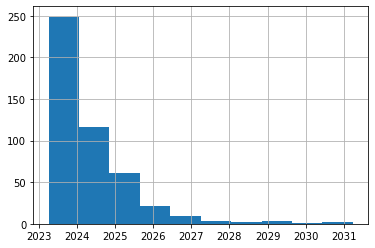

In [87]:
#строим распределение дат готовности данных объектов
df[df.Ready100PercDt>s].Ready100PercDt.hist()

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [140]:
#меняем и сохраняем в другой формат датафрэйм
import pickle
df.to_pickle('C:\\Users\\brigh\\PycharmProjects\\train\\dummy.pkl')

In [141]:
fpath = 'dummy.pkl'
with open(fpath, 'wb') as f:
    pickle.dump(df,f)

with open(fpath, 'rb') as f:
    new_pickle = pickle.load(f)

In [169]:
unpickled_df = pd.read_pickle("./dummy.pkl") 
unpickled_df.head()

objId  rpdRegionCd                             Addr  FloorMin  FloorMax  \
0  13397           72  г Тюмень, ул Профсоюзная, д. 56         6        12   
1  13383           72                         г Тюмень         4        20   
2  13398           72  г Тюмень, ул Профсоюзная, д. 56         7        10   
3  13399           72  г Тюмень, ул Профсоюзная, д. 56         1         1   
4  23682           47                      д Агалатово        10        10   

   ElemLivingCnt Ready100PercDt  SquareLiving  CompensFundFlg  ProblemFlg  \
0             65     2024-12-31       6248.51               0           0   
1             68     2022-06-30       6289.98               1           0   
2             43     2024-12-31       4812.98               0           0   
3              0     2024-12-31          0.00               0           0   
4             54     2022-06-30       2748.15               1           0   

   ...                developer.orgForm.fullForm  developer.orgForm.shortForm  \
0  ...                      Акционерное общество                           АО   
1  ...                      Акционерное общество                           АО   
2  ...                      Акционерное общество                           АО   
3  ...                      Акционерное общество                           АО   
4  ...  Общество с ограниченной ответственностью                          ООО   

  developer.companyGroup developer.devInn                objCommercNm  \
0           6.994210e+08       7701651356                         NaN   
1           6.994210e+08       7701651356                         NaN   
2           6.994210e+08       7701651356                         NaN   
3           6.994210e+08       7701651356                         NaN   
4           5.562608e+09       7806536079  Жилой комплекс "84 высота"   

   complexShortName developer.bankruptStage.bankruptStageCd  \
0               NaN                                     NaN   
1               NaN                                     NaN   
2               NaN                                     NaN   
3               NaN                                     NaN   
4               NaN                                     NaN   

   developer.bankruptStage.bankruptStageDesc  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  developer.bankruptStage.bankruptLawUrl  developer.orgBankruptMsgDttm  
0                                    NaN                           NaN  
1                                    NaN                           NaN  
2                                    NaN                           NaN  
3                                    NaN                           NaN  
4                                    NaN                           NaN  

[5 rows x 35 columns]

In [ ]:
# переходим к конвертации в excel, а затем к конвертации обратно в df

In [167]:
df.to_excel('output.xlsx')
from_excel_df = pd.read_excel('output.xlsx')
from_excel_df.iloc[:,1:].tail()

objId  rpdRegionCd                                               Addr  \
995  11019           50                                       д Покровское   
996  11016           50                                       д Покровское   
997  43491           76  г Ярославль, пр-т Машиностроителей, д. 6,6, ли...   
998  25252           61  г Ростов-на-Дону, проспект Михаила Нагибина, д...   
999  41834           50                           с/п Развилковское, д. 10   

     FloorMin  FloorMax  ElemLivingCnt Ready100PercDt  SquareLiving  \
995         2         2              5     2022-12-31        843.10   
996         2         2              6     2022-12-31       1011.70   
997        18        18            144     2023-09-30       8541.32   
998        20        20            207     2022-06-30      23428.99   
999        19        19            282     2023-06-30      15722.90   

     CompensFundFlg  ProblemFlg  ...  \
995               1           0  ...   
996               1           0  ...   
997               0           0  ...   
998               1           0  ...   
999               0           0  ...   

                   developer.orgForm.fullForm  developer.orgForm.shortForm  \
995  Общество с ограниченной ответственностью                          ООО   
996  Общество с ограниченной ответственностью                          ООО   
997  Общество с ограниченной ответственностью                          ООО   
998  Общество с ограниченной ответственностью                          ООО   
999  Общество с ограниченной ответственностью                          ООО   

    developer.companyGroup developer.devInn  \
995           5.127020e+09       7707796333   
996           5.127020e+09       7707796333   
997           4.549540e+08       7603066710   
998           6.605718e+09       7701361819   
999                    NaN       7724743980   

                                 objCommercNm  complexShortName  \
995  ЖК Футуро Парк (Futuro Park), Корпус №62               NaN   
996  ЖК Футуро Парк (Futuro Park), Корпус №60               NaN   
997                                       NaN               NaN   
998                                       NaN               NaN   
999                          ЖК"Три квартала"               NaN   

    developer.bankruptStage.bankruptStageCd  \
995                                     NaN   
996                                     NaN   
997                                     NaN   
998                                     NaN   
999                                     NaN   

     developer.bankruptStage.bankruptStageDesc  \
995                                        NaN   
996                                        NaN   
997                                        NaN   
998                                        NaN   
999                                        NaN   

    developer.bankruptStage.bankruptLawUrl  developer.orgBankruptMsgDttm  
995                                    NaN                           NaN  
996                                    NaN                           NaN  
997                                    NaN                           NaN  
998                                    NaN                           NaN  
999                                    NaN                           NaN  

[5 rows x 35 columns]

In [168]:
type(from_excel_df)

pandas.core.frame.DataFrame

# Данные по определенному объекту

In [6]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

In [7]:
res = requests.get(url)
res.json()

{'data': {'id': 36774,
  'pdId': 351714,
  'developer': {'devId': 6926,
   'devShortCleanNm': 'ОКЕАН',
   'devShortNm': 'ОКЕАН',
   'devFullCleanNm': 'ОКЕАН',
   'problObjCnt': 0,
   'buildObjCnt': 1,
   'comissObjCnt': 0,
   'regRegionDesc': 'Башкортостан Республика',
   'devPhoneNum': '+7(927)300-31-01',
   'devSite': 'altun-yar.ru',
   'devEmail': 'khabibovr@mail.ru',
   'devInn': '0277093608',
   'devOgrn': '1080277004521',
   'devKpp': '027701001',
   'devLegalAddr': 'Башкортостан Республика, город Уфа, проспект Проспект Октября дом 85',
   'devFactAddr': 'Респ Башкортостан Город Уфа Проспект Октября д. 85',
   'lastRpdId': 511041,
   'fundGuarantyFlg': 0,
   'devOrgRegRegionCd': 2,
   'devEmplMainFullNm': 'Хабибов Рамиль Хамидуллович',
   'developerGroupName': 'Океан',
   'orgForm': {'id': 4,
    'fullForm': 'Общество с ограниченной ответственностью',
    'shortForm': 'ООО'},
   'companyGroupId': 5767476001,
   'objGuarantyEscrowFlg': 1,
   'govFundFlg': 0},
  'region': 2,
  'add

In [33]:
import pandas as pd

errcode  data.id  data.pdId  data.developer.devId  \
0       0    36774     351714                  6926   

  data.developer.devShortCleanNm data.developer.devShortNm  \
0                          ОКЕАН                     ОКЕАН   

  data.developer.devFullCleanNm  data.developer.problObjCnt  \
0                         ОКЕАН                           0   

   data.developer.buildObjCnt  data.developer.comissObjCnt  ...  \
0                           1                            0  ...   

  data.objElevatorCargoCnt data.soldOutPerc data.objPriceAvg  \
0                        0              1.0            45187   

             data.generalContractorNm data.nonlivFirstFloor  \
0  ООО НЕРУД ИНВЕСТ (ИНН: 0277077148)                     1   

  data.objectTransportInfo data.conclusion data.objLkSaleDepEmail  \
0                       []           False      khabibovr@mail.ru   

  data.objGreenHouseFlg  data.objEnergyEffShortDesc  
0                     0                           C  

[1 rows x 83 columns]